## IRIS FLOWER CLASSIFICATION ML PROJECT

### Data set- Iris Data set

###  Bhaskar Sahu

#### The IRIS flower dataset contain three classes of flowers ,versicolor , Setosa and Virginica. The Aim of this project is to prediction of flowers based on their Features.

### Importing the Important Libraries


In [73]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [74]:
#Importing Warning
import warnings
warnings.filterwarnings("ignore")

### Loading the Data set

In [75]:
df = pd.read_csv("iris.data")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [76]:
# Lets check the type of Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [77]:
# Checking the Shape of DataFrame
df.shape

(149, 5)

## Inspecting the Null Values

In [78]:
df.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

## Lets Rename Each of the Column to its Respective Type

In [79]:
df.rename(columns = {"5.1":"SepalLength", "3.5":"SepalWidth", "1.4":"PetalLength", "0.2":"PetalWidth","Iris-setosa":"Species"},inplace = True)

In [80]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [81]:
# let's look at the statistical aspects of the dataframe
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [82]:
# Checking Unique Values in DataFrame
df.nunique()

SepalLength    35
SepalWidth     23
PetalLength    43
PetalWidth     22
Species         3
dtype: int64

In [83]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Checking Correlation Betweeen the Variables Using HEATMAP

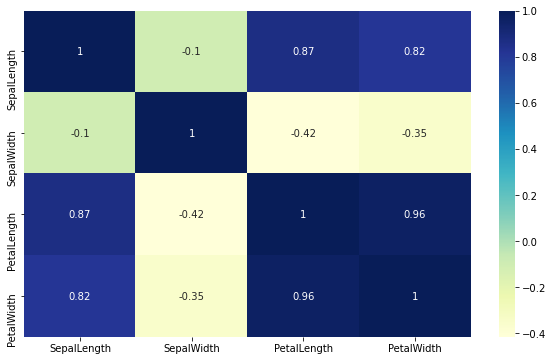

In [84]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu");

## Checking Outliers in the Data Using Box-Plot

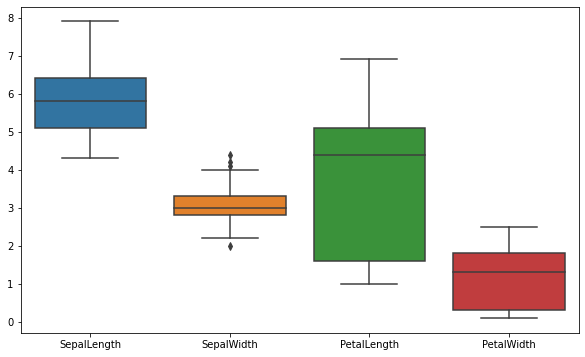

In [85]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df);

## Visualization of Species Column

Text(0.5, 1.0, 'Distibution of Species')

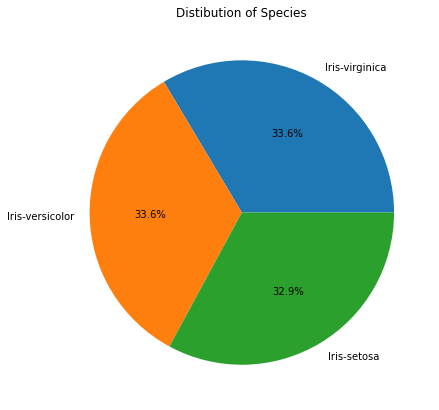

In [86]:
df1 = df.Species.value_counts()
cat =["Iris-virginica","Iris-versicolor","Iris-setosa"]
plt.figure(figsize =(10, 7))
plt.pie(df1,labels = cat,autopct='%1.1f%%')
plt.title("Distibution of Species")

## Visualization of Species Column By PAIR PLOT
### PAIR PLOT:
#### It visualizes given data to find the relationship between them where the variables can be continous or categorical

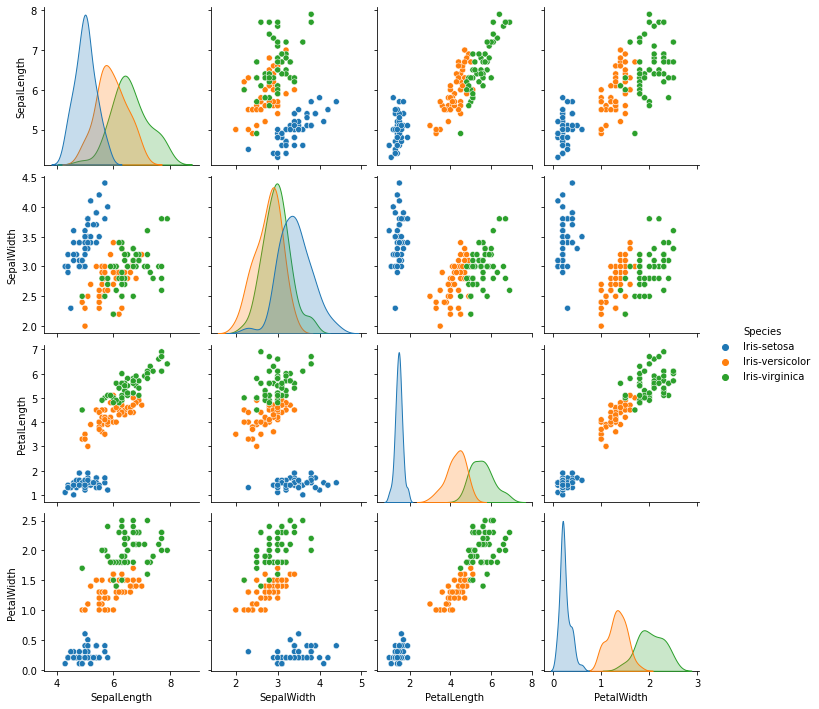

In [87]:
sns.pairplot(df,hue="Species");

## Lets Analyse With Again With Violin Plot

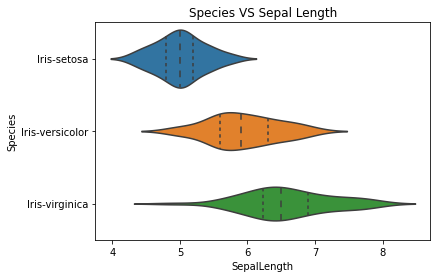

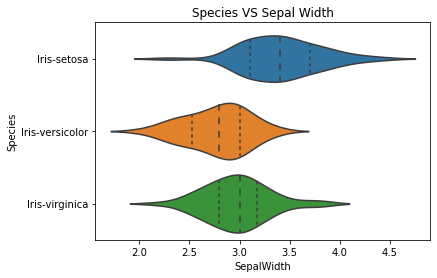

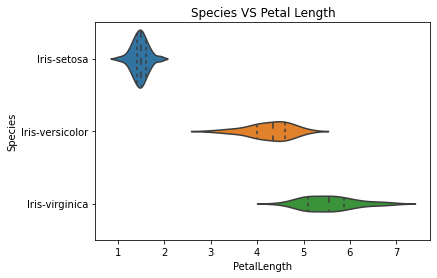

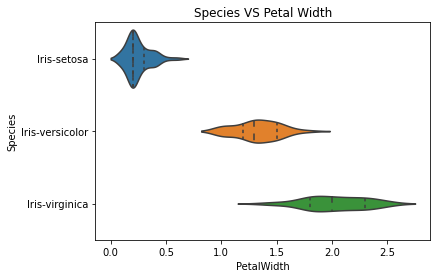

In [88]:
g = sns.violinplot(y='Species', x='SepalLength', data=df, inner='quartile')
plt.title("Species VS Sepal Length")
plt.show()
g = sns.violinplot(y='Species', x='SepalWidth', data=df, inner='quartile')
plt.title("Species VS Sepal Width")
plt.show()
g = sns.violinplot(y='Species', x='PetalLength', data=df, inner='quartile')
plt.title("Species VS Petal Length")
plt.show()
g = sns.violinplot(y='Species', x='PetalWidth', data=df, inner='quartile')
plt.title("Species VS Petal Width")
plt.show()

In [89]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


##  Importing Libraries for Train- Test Split

In [90]:
from sklearn.model_selection import train_test_split

## Putting feature variable to X

In [91]:
X = df[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
y = df["Species"]
print(X.shape)
print(y.shape)

(149, 4)
(149,)


## Splitting Into Train and Test

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=40)

In [93]:
# #Using LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [94]:
y_pred = lr.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']


In [95]:
#Making Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[16  0  0]
 [ 0 13  1]
 [ 0  1 14]]


## Checking Detailed Classification report

In [96]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [97]:
# Checking Accuracy
print('Accuracy:',lr.score(X_test,y_test))

Accuracy: 0.9555555555555556


# So, Finally We achieved the Accuracy of 95.55 % 